# testing API

In [84]:
import requests
from requests import Response
import pandas as pd
import numpy as np

from sklearn.metrics import auc, confusion_matrix, precision_recall_curve

from utils import utils


In [99]:
url = "http://127.0.0.1:8000/predict"

data = pd.read_csv("dataset/test_df.csv")


In [100]:
# the columns that pass the float16 limite, we gonna take them and turn and something
# that we can work using min max scaler

max_account = data["account_id"].max()
max_device_id = data["device_id"].max()
max_processed_at = data["processed_at"].max()
max_time_client = data["time_client"].max()

data["account_id"] = data["account_id"] / max_account
data["device_id"] = data["device_id"] / max_device_id
data["processed_at"] = data["processed_at"] / max_processed_at
data["time_client"] = data["time_client"] / max_time_client

# seconds to days

data.time_client = data.time_client / (60*60*24)

data.drop("account_id", axis=1, inplace=True)

Y = data.pop("is_fraud")

display(data.head())
print("Data shape", data.shape)
print("Y shape", Y.shape)

,device_id,balance,processed_at,age_range,number_of_selfies_sent,time_client,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
0,0.079516,1.171346e-04,0.997930,2.0,5.0,2.086332e-06,0,0,1,0
1,0.322674,3.349513e-05,0.999712,2.0,5.0,3.173570e-07,0,0,1,0
2,0.021523,3.219548e-05,0.999705,0.0,6.0,5.864763e-06,0,1,0,0
3,0.710520,5.908321e-07,0.999699,0.0,5.0,3.511746e-06,0,1,0,0
4,0.170769,4.676034e-06,0.999079,0.0,5.0,9.264011e-07,0,1,0,0


Data shape (9410, 10)
Y shape (9410,)


In [101]:
obj = {"samples": data.to_dict("records")}


In [102]:
response = requests.post(url,json=obj)

In [104]:
predict = np.array(list(response.json().values()))

AUC PRC: 0.6712584130357775


Final model


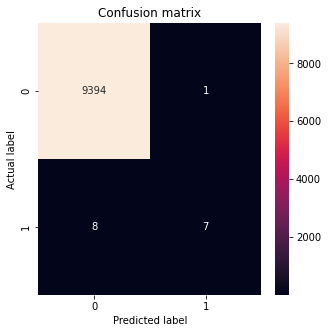

In [105]:
precision, recall, _ = precision_recall_curve(Y, predict)
pr_auc = auc(recall, precision)

print("AUC PRC:", pr_auc)
print("\n")
utils.plot_cm(Y, predict, "Final model")